In [1]:
import numpy as np
from scipy.constants import c
import h5py as hp
from aps_figures.aps_one_column import *
from machine_data.TDR2 import *
from postprocessing import *
import matplotlib.pyplot as plt
from machine_data.soleil import v2366, v2366_v2, v2366_v3


mbtrack2 version 0.7.0.14
--------------------------------------------------
If used in a publication, please cite mbtrack2 paper and the zenodo archive for the corresponding code version (and other papers for more specific features).
[1] A. Gamelin, W. Foosang, N. Yamamoto, V. Gubaidulin and R. Nagaoka, “mbtrack2”. Zenodo, Jull. 17, 2024. doi: 10.5281/zenodo.12749990.
[2] A. Gamelin, W. Foosang, and R. Nagaoka, “mbtrack2, a Collective Effect Library in Python”, presented at the 12th Int. Particle Accelerator Conf. (IPAC'21), Campinas, Brazil, May 2021, paper MOPAB070.




In [14]:
ring = v2366_v3(IDs='open',)
ring.chro = [0.0, 0.0]
Q_S = ring.synchrotron_tune(1.7e6)
f"{ring.mcf[0]:.2e}"
def chro2xi(chro, ring, taub=9e-12):
    return chro*ring.omega0/ring.mcf[0]*taub
    # return 2*np.pi*chro*(c/2304)/3.3e-5*taub
    
print(chro2xi(2, ring, taub = 16e-12))
def chro2xiPETRA(chro, ring, taub=9e-12):
    return chro*np.pi*chro*(c/2304)/3.3e-5*taub
print(chro2xiPETRA(4, ring, taub = 16e-12))


1.5922208433229295
3.1711305846950384


### Head-tail instability

/tmp/ipykernel_16364/4046980445.py:13: RuntimeWarning: divide by zero encountered in divide
  ax.plot(tmci_current*ring.T0*1e9, 1/(risetimes_no_sc_tmci), lw=2, marker='.', color='b', label='\\texttt{mbtrack2} w/o SC')


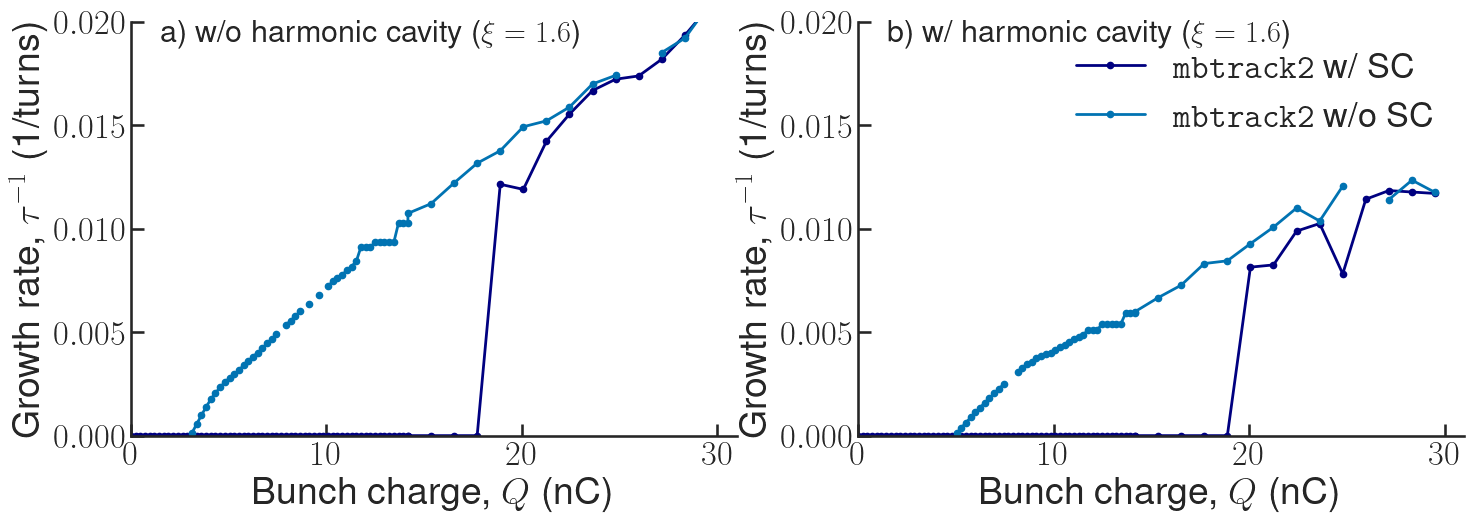

In [61]:
Q_s0 = 2.0e-3
sbs.set_context('talk', font_scale=1.5)
sbs.color_palette('colorblind')
fig, axs = plt.subplots(1, 2)
appendix = '', 'hc'
for i, ax in enumerate(axs):
    risetimes_sc_tmci = np.concatenate((np.load(f'sc_0-12{appendix[i]}.npy'), np.load(f'sc_12-20{appendix[i]}.npy')))
    risetimes_no_sc_tmci = np.concatenate((np.load(f'nosc_0-12{appendix[i]}.npy'), np.load(f'nosc_12-20{appendix[i]}.npy')))
    risetimes_sc_tmci[-2] = 0.5*(risetimes_sc_tmci[-1]+risetimes_sc_tmci[-3])
    risetimes_sc_tmci[risetimes_sc_tmci==0] = np.inf
    tmci_current = 1e-3*np.concatenate((np.linspace(0, 12, 60), np.linspace(12, 25, 14)))
    ax.plot(tmci_current*ring.T0*1e9, 1/(risetimes_sc_tmci), lw=2, marker='.', color='navy', label='\\texttt{mbtrack2} w/ SC')
    ax.plot(tmci_current*ring.T0*1e9, 1/(risetimes_no_sc_tmci), lw=2, marker='.', color='b', label='\\texttt{mbtrack2} w/o SC')
# for damper_gain in [0]:#, 5e-3, 1e-2, 2e-2]:
#     df = pd.read_csv(f'~/scripts/analytical/delphi/data/tmp/delphi(sigma_z={sig_z:.1e},ID=close,plane=vertical,Qp=0.0,M=1,Q_s={Q_s:.1e},n_max=0,damper_gain={damper_gain:.1e},ximpedance={ximp:.1f}).csv', sep='\t')
#     df['BunchLength'].unique()/4
#     df = df.drop_duplicates(['BunchCurrent'], keep='first')
#     plt.plot(df['BunchCurrent']/1e-3, -df['eigvals_im']/Q_s0, lw=2, marker='.',
#              # label=f'DELPHI g={damper_gain:.3f} (1/turns)',
#              label='\\texttt{DELPHI} w/o SC',
#              color='r'
#             )
    ax.set_xlim(0, )
    ax.set_ylim(0, .02)
    ax.set_xlabel('Bunch charge, $Q$ (nC)')
    ax.set_ylabel('Growth rate, $\\tau^{-1}$ (1/turns)')

axs[0].text(0.05, 0.95, 'a) w/o harmonic cavity ($\\xi=1.6$)', transform=axs[0].transAxes, fontsize=22, fontweight='bold')
axs[1].text(0.05, 0.95, 'b) w/ harmonic cavity ($\\xi=1.6$)', transform=axs[1].transAxes, fontsize=22, fontweight='bold')

# plt.ylabel('Growth rate, $\Im\Delta Q_\mathrm{coh}/Q_{s_0}$')

# plt.title('Head-tail instability, w/ harmonic cavity')
plt.legend()
plt.savefig('../../data/processed/tmci/SOLEIL_HT.png')
plt.savefig('../../data/processed/tmci/SOLEIL_HT.pdf')

### TMCI 

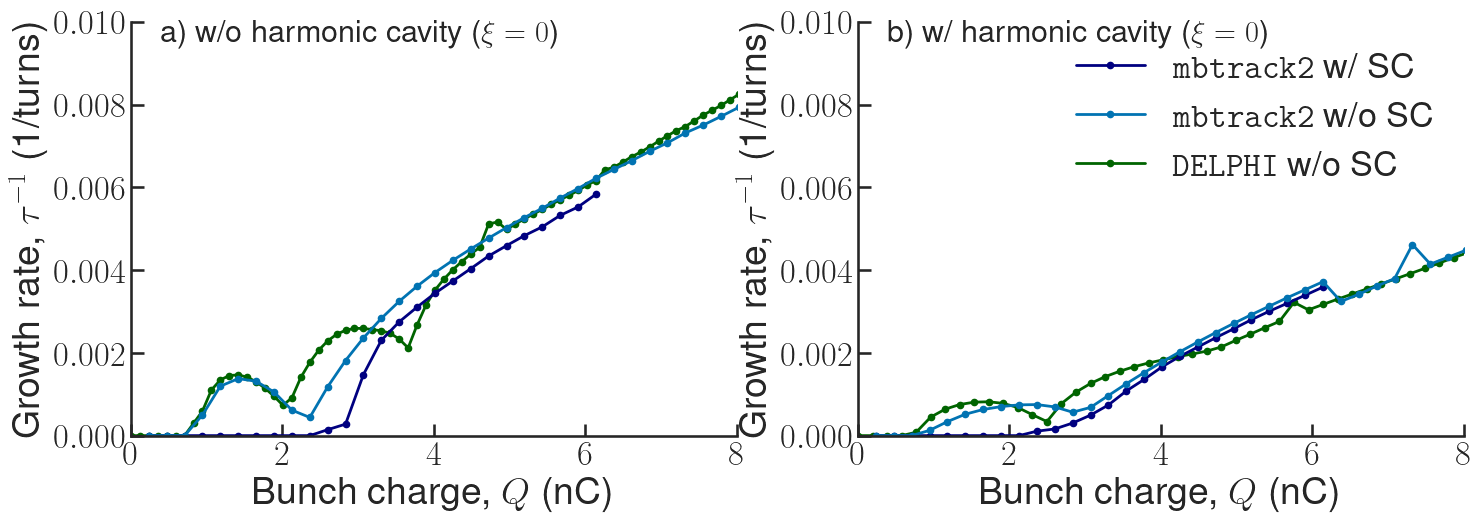

In [62]:
from aps_figures.aps_two_column import *
Q_s0 = 2.0e-3
sbs.set_context('talk', font_scale=1.5)

sbs.color_palette('colorblind')
fig, axs = plt.subplots(1, 2)
appendix = '', '_hc'
sig_z = 23e-12, 63e-12
Q_s = 0.95e-3, 2.7e-4
damper_gain = 0
ximp=1
for i, ax in enumerate(axs):
    risetimes_sc_tmci = np.load(f'tmci_sc{appendix[i]}.npy')
    risetimes_no_sc_tmci = np.load(f'tmci_nosc{appendix[i]}.npy')
    risetimes_no_sc_tmci[-8] = 0.5*(risetimes_no_sc_tmci[-9]+risetimes_no_sc_tmci[-7])
    # print(risetimes_no_sc_tmci)
    risetimes_no_sc_tmci[risetimes_no_sc_tmci==0] = np.inf
    risetimes_sc_tmci[risetimes_sc_tmci==0] = np.inf
    risetimes_sc_tmci[-9:] = np.nan
    
    tmci_current = 1e-3*np.linspace(0.2, 7, 35)
    ax.plot(tmci_current*ring.T0*1e9, 1/(risetimes_sc_tmci), lw=2, marker='.', color='navy', label='\\texttt{mbtrack2} w/ SC')
    ax.plot(tmci_current*ring.T0*1e9, 1/(risetimes_no_sc_tmci), lw=2, marker='.', color='b', label='\\texttt{mbtrack2} w/o SC')
    df = pd.read_csv(f'~/scripts/analytical/delphi/data/tmp/delphi(sigma_z={sig_z[i]:.1e},ID=close,plane=vertical,Qp=0.0,M=1,Q_s={Q_s[i]:.1e},n_max=0,damper_gain={damper_gain:.1e},ximpedance={ximp:.1f}).csv', sep='\t')
    df['BunchLength'].unique()/4
    df = df.drop_duplicates(['BunchCurrent'], keep='first')
    if i == 1:
        df['BunchCurrent'] *= 65/40
        df['eigvals_im'] *= 65/40
    ax.plot(df['BunchCurrent']*ring.T0*1e9, -2*np.pi*df['eigvals_im'], lw=2, marker='.',
             label='\\texttt{DELPHI} w/o SC',
             color='darkgreen',
            zorder=-1
            )

    ax.set_xlim(0, 8)
    ax.set_ylim(0, .01)
    ax.set_xlabel('Bunch charge, $Q$ (nC)')
    ax.set_ylabel('Growth rate, $\\tau^{-1}$ (1/turns)')

axs[0].text(0.05, 0.95, 'a) w/o harmonic cavity ($\\xi = 0$)', transform=axs[0].transAxes, fontsize=22, fontweight='bold')
axs[1].text(0.05, 0.95, 'b) w/ harmonic cavity ($\\xi = 0$)', transform=axs[1].transAxes, fontsize=22, fontweight='bold')
plt.legend()
plt.savefig('../../data/processed/tmci/SOLEIL_TMCI.png')
plt.savefig('../../data/processed/tmci/SOLEIL_TMCI.pdf')

In [20]:
T = np.load('fftT_nosc.npy')
F = np.load('fftF_nosc.npy')
amps = np.load('fftamps_nosc.npy')

In [77]:
%matplotlib inline
sbs.set_context('talk', font_scale=1.5)

fig, (ax1, ax2) = plt.subplots(1, 2)
for i, ax in enumerate([ax1, ax2]):
    if i == 0:
        T = np.load('fftT_nosc.npy')
        F = np.load('fftF_nosc.npy')
        amps = np.load('fftamps_nosc.npy')
        mesh = ax.pcolormesh(T*ring.T0*1e9, F, amps, cmap='binary', shading='gouraud', rasterized=True)
    if i == 1:
        T = np.load('fftT_sc.npy')
        F = np.load('fftF_sc.npy')
        amps = np.load('fftamps_sc.npy')
        mesh = ax.pcolormesh(T*ring.T0*1e9, F, amps, cmap='binary', shading='gouraud',  rasterized=True)
    Q_Y = .3
    Q_S = 0.002
    multiple_of = 3
    ax.set_ylim(Q_Y - np.floor(Q_Y) - multiple_of * Q_S,
                Q_Y - np.floor(Q_Y) + multiple_of * Q_S)
    ax.set_yticks(
        np.linspace(Q_Y - np.floor(Q_Y) - multiple_of * Q_S,
                    Q_Y - np.floor(Q_Y) + multiple_of * Q_S,
                    2 * multiple_of + 1))
    labels = ['$\\nu_y-\\nu_s$', '$\\nu_y$', '$\\nu_y+\\nu_s$']
    for i in range(2, multiple_of + 1):
        labels.insert(0, '$\\nu_y-{:}\\nu_s$'.format(i))
        labels.append('$\\nu_y+{:}\\nu_s$'.format(i))
    ax.set_yticklabels(labels, rotation=45)
    ax.set_xlabel('Bunch charge, $Q$ (nC)')
    ax.set_xlim(0, 6)

ax1.set_ylabel('Coherent frequency, $\omega/\omega_0$')

Q_s0 = 2.e-3
Q_s = 1.1e-3
sigma_z = 27e-12
Qp = 0.0
damper_gain = 0
ximp = 1.0
damper_gain = 0
df = pd.read_csv(f'~/scripts/analytical/delphi/data/tmp/delphi(sigma_z={sigma_z:.1e},ID=close,plane=vertical,Qp={Qp:.1f},M=1,Q_s={Q_s:.1e},n_max=0,damper_gain={damper_gain:.1e},ximpedance={ximp:.1f}).csv', sep='\t')
ax1.scatter(1e3*df['BunchCurrent'], df['eigvals_re']+Q_Y, marker='.', s=2, color='b', label='\\texttt{DELPHI} all modes',  rasterized=True, alpha=0.2)
# ax.set_ylabel('$\mathrm{Re}\Delta Q/Q_{s_0}$')
df = df.drop_duplicates(['BunchCurrent'], keep='first')
ax1.scatter(df['BunchCurrent']*ring.T0*1e9, df['eigvals_re']+Q_Y, marker='.', color='darkgreen', label='\\texttt{DELPHI} most unstable mode',  rasterized=True)
ax1.legend(loc='upper left', frameon=True, fontsize=18)
fig.colorbar(mesh, ax=[ax1, ax2], label='Spectrum power \\texttt{mbtrack2}', )

ax1.text(0.8, 1.05, 'a) w/o SC', transform=ax1.transAxes, fontsize=22, fontweight='bold')
ax2.text(0.8, 1.05, 'b) w/ SC', transform=ax2.transAxes, fontsize=22, fontweight='bold')
# plt.savefig('SOLEIL_TMCI_real_part.pdf')
# plt.savefig('SOLEIL_TMCI_real_part.png')

Text(0.8, 1.05, 'b) w/ SC')

### TCBI

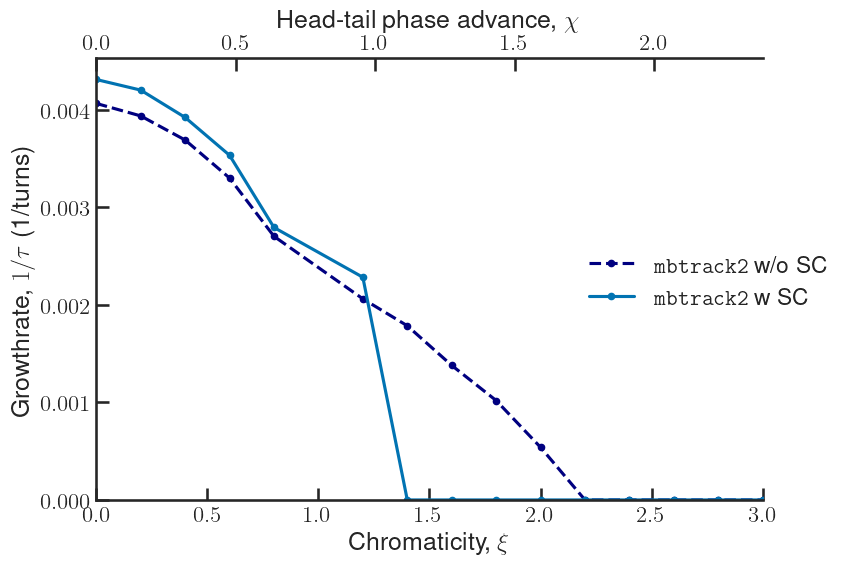

In [38]:
from aps_figures.aps_one_column import *

chromaticities = np.array([-0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
tau_nosc = np.array([268, 254, 246, 246, 254, 271, 303, 370, 485, 560, 725, 981, 1854, np.inf, np.inf, np.inf, np.inf, np.inf])
tau_sc = np.array([256, 241, 233, 232, 238, 255, 283, 358, 438, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf ])
fig, ax = plt.subplots(1, 1)
ax.plot(chromaticities, 1/tau_nosc, marker='.', color='navy',ls='dashed', label='\\texttt{mbtrack2} w/o SC')
ax.plot(chromaticities, 1/tau_sc, marker='.', color='b',  label='\\texttt{mbtrack2} w SC')
ax.set_xlim(0, 3.0)
ax.set_ylim(0, )

sigma_z = 16e-12
Q_s = 1.2e-3
Q_s0 = 2.1e-3
ximp=1.0
damper_gain = 0
id_state = 'close'
plane='vertical'
Ib = 1.2e-3

# filename = f'/home/gubaidulin/scripts/analytical/delphi/data/tmp/delphi(sigma_z={sigma_z:.1e},id={id_state:},plane={plane:},Ib={Ib:.1e},M=416,Q_s={Q_s:.1e},n_max=415,damper_gain={damper_gain:.1e},impedance_multiplier={ximp:.1f}).csv'
# df = pd.read_csv(filename, sep='\t')
# df = df.drop_duplicates(['chromaticity'])
# df = df.dropna(axis=1)
# ax.plot(np.array(df['chromaticity'][:]), -np.array(df['eigvals_im'])*(2*np.pi), lw=2, ls='dashed', marker='.', color='r', label="\\texttt{DELPHI} w/o SC")
def chro_to_chi(x):
    taub = sigma_z
    return x*ring.omega0/ring.mcf[0]*taub


def chi_to_chro(x):
    taub = sigma_z
    return x*(ring.omega0/ring.mcf[0]*taub)**-1
ax.set_xlabel("Chromaticity, $\\xi$")
ax.set_ylabel("Growthrate, $1/\\tau$ (1/turns)")
secax = ax.secondary_xaxis('top', functions=(chro_to_chi, chi_to_chro))
secax.set_xlabel("Head-tail phase advance, $\chi$")
fig.legend(loc='center right')
plt.savefig('../../data/processed/tcbi/SOLEIL_TCBI.png')
plt.savefig('../../data/processed/tcbi/SOLEIL_TCBI.pdf')

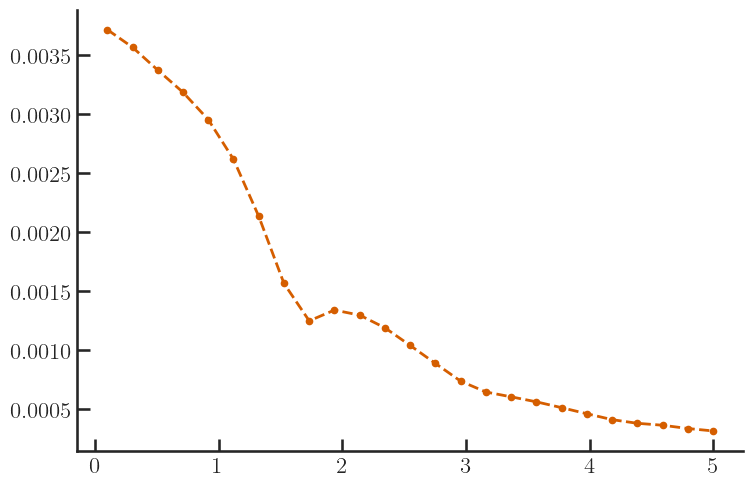

In [39]:
%matplotlib inline
sigma_z = 16e-12
Q_s = 1.2e-3
Q_s0 = 2.1e-3
ximp=1.0
damper_gain = 0
id_state = 'close'
plane='vertical'
Ib = 1.2e-3
fig, ax = plt.subplots(1, 1)
filename = f'/home/gubaidulin/scripts/analytical/delphi/data/tmp/delphi(sigma_z={sigma_z:.1e},id={id_state:},plane={plane:},Ib={Ib:.1e},M=416,Q_s={Q_s:.1e},n_max=415,damper_gain={damper_gain:.1e},impedance_multiplier={ximp:.1f}).csv'
df = pd.read_csv(filename, sep='\t')
df = df.drop_duplicates(['chromaticity'])
df = df.dropna(axis=1)
ax.plot(np.array(df['chromaticity'][:]), -np.array(df['eigvals_im'])*(2*np.pi), lw=2, ls='dashed', marker='.', color='r', label="\\texttt{DELPHI} w/o SC")
# ax.plot(np.array(df['chromaticity'][:]), .3 + np.array(df['eigvals_re']), lw=2, ls='dashed', marker='.', color='r', label="\\texttt{DELPHI} w/o SC")
# Q_Y = .3
# Q_S = 0.002
# multiple_of = 4
# ax.set_ylim(Q_Y - np.floor(Q_Y) - multiple_of * Q_S,
#             Q_Y - np.floor(Q_Y) + multiple_of * Q_S)
# ax.set_yticks(
#     np.linspace(Q_Y - np.floor(Q_Y) - multiple_of * Q_S,
#                 Q_Y - np.floor(Q_Y) + multiple_of * Q_S,
#                 2 * multiple_of + 1))
# labels = ['$\\nu_y-\\nu_s$', '$\\nu_y$', '$\\nu_y+\\nu_s$']
# for i in range(2, multiple_of + 1):
#     labels.insert(0, '$\\nu_y-{:}\\nu_s$'.format(i))
#     labels.append('$\\nu_y+{:}\\nu_s$'.format(i))
# ax.set_yticklabels(labels, rotation=45)